In [1]:
import wisardpkg as wp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [2]:
MNIST = fetch_openml('mnist_784', version=1, as_frame=False)

X = MNIST.data[:10000]
y = MNIST.target[:10000]

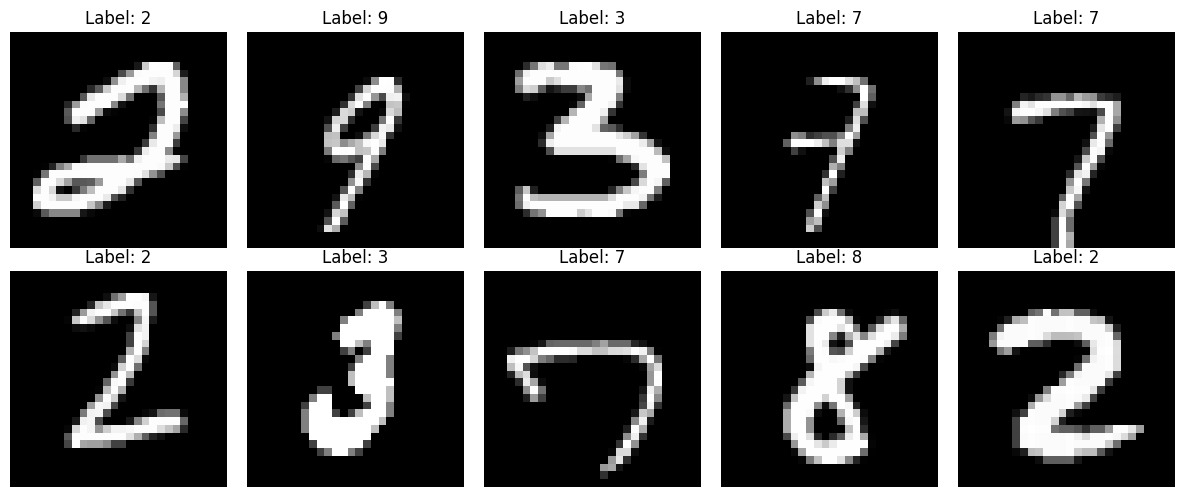

In [3]:
indices = np.random.choice(len(X), 10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
X_reshaped = X.reshape(-1, 28, 28)
X_reshaped[0].shape
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [5]:
def drawFig(idx):
    plt.imshow(X_reshaped[idx], cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
    plt.show()

# Random Kernel Canvas

In [6]:
class RandomKernelCanvas():
    def __init__(self, shape : tuple, numberOfKernels : int, bitsByKernel : int = 3, activationDegree : float = 0.07):
        self.numberOfKernels = numberOfKernels
        self.bitsByKernel = bitsByKernel
        self.activationDegree = activationDegree
        self.shape = shape
        self.closestKernel: dict[tuple[int, int], int] = {}
        
        self.makeKernel()
        self.findClosestKernels()
        
    def squareDistance(self, x, y):
        diff = []
        for i in range(len(x)):
            diff.append(x[i] - y[i])
            
        diff = np.array(diff)
        
        return np.sum(np.pow(diff, 2))
        
    def makeKernel(self):
        points = np.random.choice(np.prod(self.shape), size=self.numberOfKernels, replace=False)
        self.kernel_points = set([(point // self.shape[1], point % self.shape[1]) for point in points])
        
    def findClosestKernels(self):
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                self.closestKernel[(i, j)] = int(self.findClosestKernel((i, j)))
        
    def findClosestKernel(self, x):
        distances = [self.squareDistance(x, i) for i in self.kernel_points]
        return np.argmin(distances)
        
    def showCanvas(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
        
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        
         # Add numbers to each square
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                ax.text(j, i, str(self.findClosestKernel((i, j))), 
                        va='center', ha='center', color='black', fontsize=6)

        plt.show()
        
    def transform(self, data) -> list:
        if data.shape != self.shape:
            raise ValueError(f"Input data shape {data.shape} does not match expected shape {self.shape}")
        ret = [0 for _ in range(self.numberOfKernels)]
        # ret = np.zeros(self.numberOfKernels, dtype=int)
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kernel_index = self.closestKernel[(i, j)]
                if(data[i, j] > self.activationDegree):
                    ret[kernel_index] = 1
        return ret
    
    def showTransformed(self, TransformedData):
        if len(TransformedData) != self.numberOfKernels:
            raise ValueError(f"Transformed data length {len(TransformedData)} does not match number of kernels {self.numberOfKernels}")
        
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        
        
        # paint the activated kernels
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if(TransformedData[self.closestKernel[(i, j)]]):
                    canvas[i, j] = [0, 0, 0]

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
            
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
                    
                

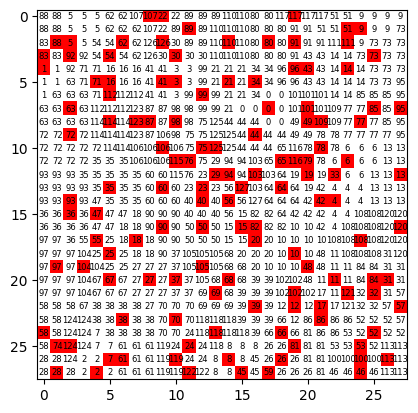

In [7]:
tst = RandomKernelCanvas((28, 28), 128, bitsByKernel=1, activationDegree=0.07)
tst.showCanvas()

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]


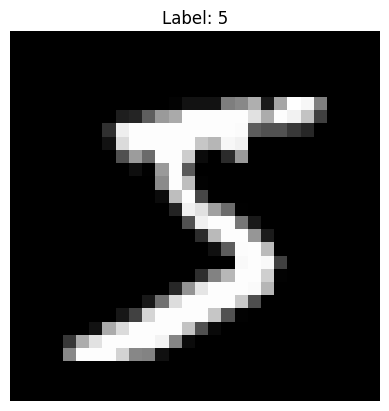

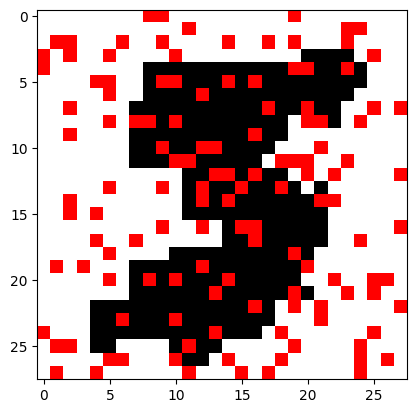

In [8]:
print(tst.transform(X_reshaped[0]))
drawFig(0)
tst.showTransformed(tst.transform(X_reshaped[0]))

In [9]:
train_points = [tst.transform(x) for x in X_train]
test_points = [tst.transform(x) for x in X_test]

In [10]:
train_ds = wp.DataSet(train_points, y_train)
test_ds = wp.DataSet(test_points, y_test)

```
addressSize=3

wsd = Wisard(
   addressSize,              # required
   bleachingActivated=True,  # optional
   ignoreZero=False,         # optional
   completeAddressing=True,  # optional
   verbose=False,            # optional
   indexes=[],               # optional
   base=2,                   # optional
   confidence=1,             # optional

   ## types of return of classify
   returnActivationDegree=False, # optional
   returnConfidence=False,       # optional
   returnClassesDegrees=False    # optional
)
```


In [11]:
def accuracy(y_pred, y_target):
  return np.where(y_pred == y_target, 1, 0).sum()/len(y_target)

In [13]:
model = wp.Wisard(16, verbose=True)
model.train(train_ds)
pred = model.classify(test_ds)
accuracy(pred, y_test)

np.float64(0.829)

# Centered Kernel Canvas

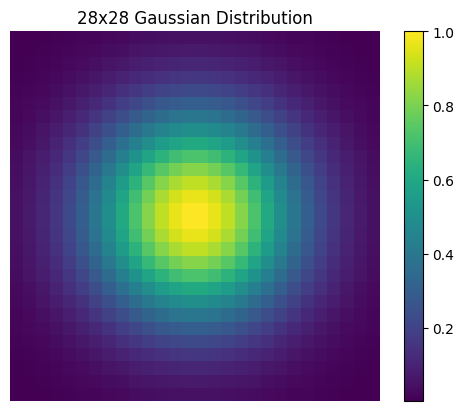

In [14]:
# Create a 28x28 Gaussian distribution centered in the grid
x = np.linspace(0, 27, 28)
y = np.linspace(0, 27, 28)
xv, yv = np.meshgrid(x, y)
mean = [13.5, 13.5]
cov = [[30, 0], [0, 30]]  # Adjust variance for spread

gaussian = np.exp(-((xv - mean[0])**2 + (yv - mean[1])**2) / (2 * cov[0][0]))
gaussian /= gaussian.max()  # Normalize to [0, 1]
plt.imshow(gaussian, cmap='viridis')
plt.colorbar()
plt.title("28x28 Gaussian Distribution")
plt.axis('off')
plt.show()


In [15]:
prob_matrix = gaussian / gaussian.sum()
flattened_prob_matrix = prob_matrix.flatten()
prob_matrix.sum()

np.float64(0.9999999999999999)

In [23]:
class CenteredKernelCanvas(RandomKernelCanvas):
    def __init__(self, shape : tuple, numberOfKernels : int, bitsByKernel : int = 3, activationDegree : float = 0.07):
        RandomKernelCanvas.__init__(self, shape, numberOfKernels, bitsByKernel, activationDegree)
        
    def makeKernel(self, weights=flattened_prob_matrix):
        flat_size = np.prod(self.shape)
        weights = np.array(weights)
        weights = weights / weights.sum()  # Normalize
        points = np.random.choice(flat_size, size=self.numberOfKernels, replace=False, p=weights)
        self.kernel_points = set([(int(point // self.shape[0]), int(point % self.shape[1])) for point in points])
        
    def mutate(self, mutationFactor=0.1):
        kernel_points_list = list(self.kernel_points)
        random_indices = np.random.choice(len(kernel_points_list), size=int(self.numberOfKernels * mutationFactor), replace=False)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
        for i in (random_indices):
            row, col = kernel_points_list[i]
            direction = np.random.choice(range(len(directions)))
            new_row = int(row + directions[direction][0])
            new_col = int(col + directions[direction][1])
            if ((new_row, new_col) not in self.kernel_points) and (new_row >= 0 and new_row < self.shape[0] and new_col >= 0 and new_col < self.shape[1]):
                self.kernel_points.remove((row, col))
                self.kernel_points.add((new_row, new_col))
            
        self.findClosestKernels()

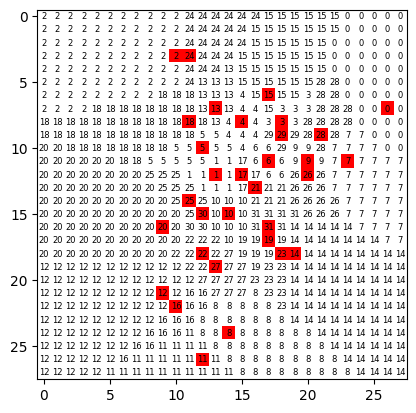

In [17]:
tst2 = CenteredKernelCanvas((28, 28), 32, bitsByKernel=1, activationDegree=0.07)
tst2.showCanvas()

In [ ]:
print(tst2.transform(X_reshaped[0]))
drawFig(0)
tst2.showTransformed(tst2.transform(X_reshaped[0]))

In [ ]:
train_points = [tst2.transform(x) for x in X_train]
test_points = [tst2.transform(x) for x in X_test]

In [18]:
from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor: train_points = list(executor.map(tst2.transform, X_train))
with ProcessPoolExecutor() as executor: test_points = list(executor.map(tst2.transform, X_test))

In [19]:
train_ds = wp.DataSet(train_points, y_train)
test_ds = wp.DataSet(test_points, y_test)

In [20]:
model = wp.Wisard(16, verbose=True)
model.train(train_ds)
pred = model.classify(test_ds)
accuracy(pred, y_test)


np.float64(0.7255)

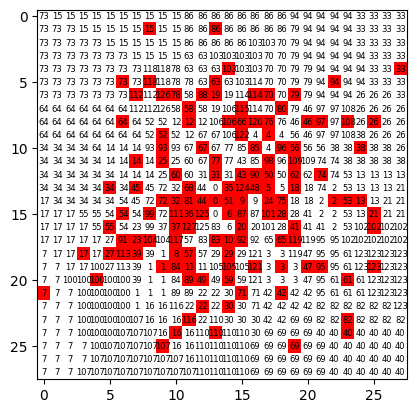

Generation 1
Accuracy with canvas  1 generation 1: 0.8895
Accuracy with canvas  2 generation 1: 0.8895
Accuracy with canvas  3 generation 1: 0.8895
Accuracy with canvas  4 generation 1: 0.8895
Accuracy with canvas  5 generation 1: 0.8895
Accuracy with canvas  6 generation 1: 0.8895
Accuracy with canvas  7 generation 1: 0.8895
Accuracy with canvas  8 generation 1: 0.8895
Accuracy generation 1: 0.8895 (model 1)


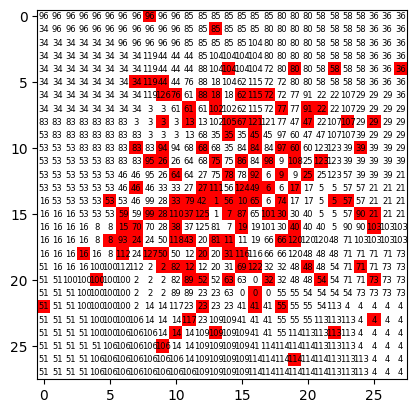

Generation 2
Accuracy with canvas  1 generation 2: 0.9045
Accuracy with canvas  2 generation 2: 0.9045
Accuracy with canvas  3 generation 2: 0.9045
Accuracy with canvas  4 generation 2: 0.9045
Accuracy with canvas  5 generation 2: 0.9045
Accuracy with canvas  6 generation 2: 0.9045
Accuracy with canvas  7 generation 2: 0.9045
Accuracy with canvas  8 generation 2: 0.9045
Accuracy generation 2: 0.9045 (model 1)


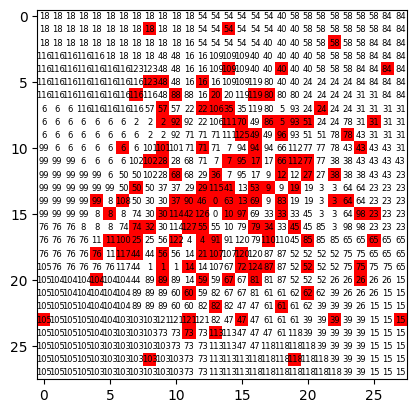

Generation 3
Accuracy with canvas  1 generation 3: 0.8975
Accuracy with canvas  2 generation 3: 0.8975
Accuracy with canvas  3 generation 3: 0.8975
Accuracy with canvas  4 generation 3: 0.8975
Accuracy with canvas  5 generation 3: 0.8975
Accuracy with canvas  6 generation 3: 0.8975
Accuracy with canvas  7 generation 3: 0.8975
Accuracy with canvas  8 generation 3: 0.8975
Accuracy generation 3: 0.8975 (model 1)


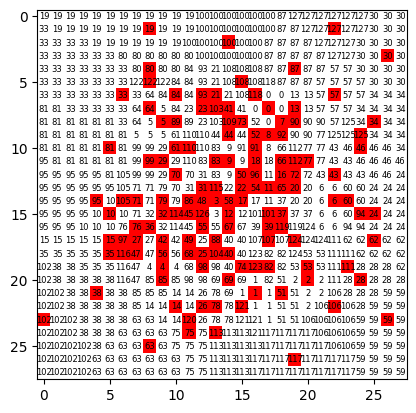

Generation 4
Accuracy with canvas  1 generation 4: 0.888
Accuracy with canvas  2 generation 4: 0.888
Accuracy with canvas  3 generation 4: 0.888
Accuracy with canvas  4 generation 4: 0.888
Accuracy with canvas  5 generation 4: 0.888
Accuracy with canvas  6 generation 4: 0.888
Accuracy with canvas  7 generation 4: 0.888
Accuracy with canvas  8 generation 4: 0.888
Accuracy generation 4: 0.888 (model 1)


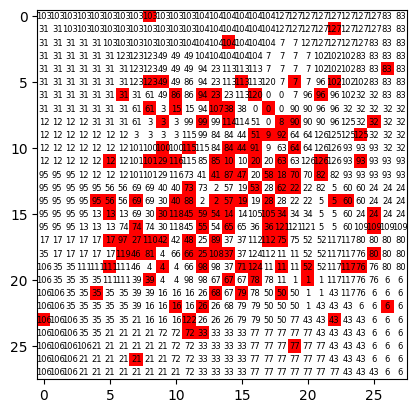

Generation 5


In [ ]:
from joblib import Parallel, delayed
from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor

generations = 10
canvas = CenteredKernelCanvas((28, 28), 128, bitsByKernel=1, activationDegree=0.07)
canvas.showCanvas()
model = wp.Wisard(16, verbose=True)

def transform_train(canvas):
    return [canvas.transform(x) for x in X_train]

def transform_test(canvas):
    return [canvas.transform(x) for x in X_test]

for i in range(generations):
    print(f"Generation {i+1}")
    genePool = [canvas] * cpu_count()
    # genePool = [canvas] * 4
    
    for canvas in genePool:
        canvas.mutate(mutationFactor=0.1)
    
    with ProcessPoolExecutor() as executor:
        train_points_list = list(executor.map(transform_train, genePool))
    with ProcessPoolExecutor() as executor:
        test_points_list = list(executor.map(transform_test, genePool))
    
    train_ds_list = [wp.DataSet(train_points, y_train) for train_points in train_points_list]
    test_ds_list = [wp.DataSet(test_points, y_test) for test_points in test_points_list]

    best_accuracy = 0
    best_model_index = 0
    for j, train_ds in enumerate(train_ds_list):
        model.train(train_ds)
        pred = model.classify(test_ds_list[j])
        acc = accuracy(pred, y_test)
        print(f"Accuracy with canvas  {j+1} generation {i+1}: {acc}")
        if acc > best_accuracy:
            best_accuracy = acc
            best_model_index = j
        model.untrain(train_ds)


    print(f"Accuracy generation {i+1}: {best_accuracy} (model {best_model_index+1})")
    genePool[best_model_index].showCanvas()
    canvas = genePool[best_model_index]  # Keep the best canvas for the next generation
    